In [7]:
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from plotnine import *
import seaborn as sns
from enhance_ocod.analysis import create_time_series_by_groups, create_mean_difference_by_groups
path = '../data/processed_price_paid/price_paid_2024.parquet'
ONSPD_path = "../data/ocod_history_processed/OCOD_FULL_2017_03.parquet"
figures_folder = Path('../figures')


# Get MSOA dwelling counts from 2021 census

https://statistics.ukdataservice.ac.uk/dataset/england-and-wales-census-2021-rm205-dwelling-type/resource/f7cde7e0-5c9b-4091-bfb6-b34db820f30e

In [2]:
msoa_dwelling = pd.read_excel('https://ukds-ckan.s3.eu-west-1.amazonaws.com/2021/ONS/dwelling-type/RM205-Dwelling-Type-2021-msoa-ONS.xlsx',
).rename(columns = {'Middle layer Super Output Areas Code':'msoa11cd', 'Observation':'dwellings'})
msoa_dwelling = msoa_dwelling.groupby('msoa11cd')['dwellings'].sum().reset_index()

<Axes: xlabel='dwellings', ylabel='Count'>

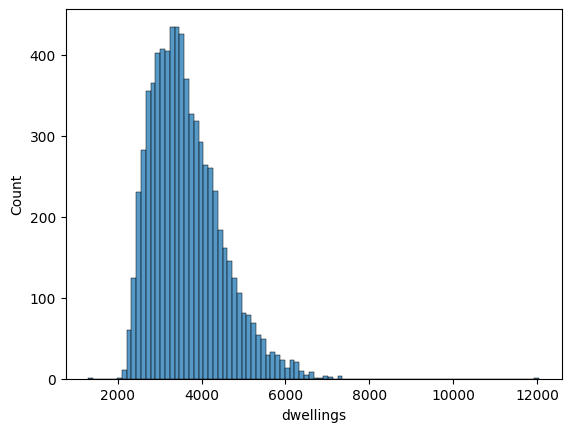

In [3]:
sns.histplot(msoa_dwelling, x = 'dwellings')

In [18]:
test = pd.read_parquet('/teamspace/studios/this_studio/enhance_ocod/data/ocod_history_processed_new/OCOD_FULL_2024_07.parquet')

In [19]:
test

,title_number,multi_id,is_multi,unique_id,unit_id,unit_type,building_name,street_number,street_name,postcode,city,district,region,property_address,oa11cd,lsoa11cd,msoa11cd,lad11cd,country_incorporated,class
0,BM166850,1,False,BM166850-1,None,None,None,None,None,None,Beaconsfield,BUCKINGHAMSHIRE,SOUTH EAST,"land at Elk Meadows, Iver, Beaconsfield",None,None,None,E06000060,BRITISH VIRGIN ISLANDS,land
1,BM169670,1,False,BM169670-1,None,None,conniburrow service station,None,Portway,MK14 7BF,Conniburrow,MILTON KEYNES,SOUTH EAST,"Conniburrow Service Station, Portway, Connibur...",E00084398,E01016718,E02003472,E06000042,JERSEY,business
2,WM200945,1,False,WM200945-1,None,None,None,None,Park Street,None,Oldbury,SANDWELL,WEST MIDLANDS,"Land on the south side of Park Street, Oldbury",E00050952,E01010066,E02002057,E08000028,JERSEY,land
3,WM205374,1,False,WM205374-1,None,None,None,797,Warwick Road,B11 2EL,Birmingham,BIRMINGHAM,WEST MIDLANDS,"797 Warwick Road, Tyseley, Birmingham (B11 2EL)",E00045793,E01009026,E02001916,E08000025,JERSEY,business
4,WM217744,1,False,WM217744-1,None,None,neville house,42-46,Hagley Road,B16 8PE,Birmingham,BIRMINGHAM,WEST MIDLANDS,"Neville House, 42-46 Hagley Road, Birmingham (...",E00045609,E01008990,E02001890,E08000025,ST KITTS AND NEVIS,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199979,NGL642927,10,True,NGL642927-10,None,None,a stanhope gardens,8,Stanhope Mews East,None,London,KENSINGTON AND CHELSEA,GREATER LONDON,"1 to 20A Stanhope Gardens, 1 to 12 Stanhope Me...",E00014217,E01002835,E02000592,E09000020,BERMUDA,residential
199980,NGL642927,11,True,NGL642927-11,None,None,a stanhope gardens,9,Stanhope Mews East,None,London,KENSINGTON AND CHELSEA,GREATER LONDON,"1 to 20A Stanhope Gardens, 1 to 12 Stanhope Me...",E00014217,E01002835,E02000592,E09000020,BERMUDA,residential
199981,NGL642927,12,True,NGL642927-12,None,None,a stanhope gardens,10,Stanhope Mews East,None,London,KENSINGTON AND CHELSEA,GREATER LONDON,"1 to 20A Stanhope Gardens, 1 to 12 Stanhope Me...",E00014217,E01002835,E02000592,E09000020,BERMUDA,residential
199982,NGL642927,13,True,NGL642927-13,None,None,a stanhope gardens,11,Stanhope Mews East,None,London,KENSINGTON AND CHELSEA,GREATER LONDON,"1 to 20A Stanhope Gardens, 1 to 12 Stanhope Me...",E00014217,E01002835,E02000592,E09000020,BERMUDA,residential


## Overall figures

THe below shows the total value of all residential property as well as the total residential value

In [8]:
overall_figures = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars=None, 
ocod_path = '../data/ocod_history_processed_new',
class_var = 'class')

100%|██████████| 99/99 [00:21<00:00,  4.61it/s]


## Region figures

THe below shows the total value of all residential property as well as the total residential value

In [9]:

df_msoa_region = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['region'], 
ocod_path = '../data/ocod_history_processed_new',
class_var = 'class')


100%|██████████| 99/99 [00:22<00:00,  4.33it/s]


In [14]:
df_msoa_region

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,region
0,2015-10-01,2015,10,251146,219416,227584,201124,1.103531,90,89360,22603177,20336941476,0.001111,EAST ANGLIA
1,2015-10-01,2015,10,123427,110932,153089,137289,0.806244,370,144903,45668272,22183176031,0.002059,EAST MIDLANDS
2,2015-10-01,2015,10,1556484,1085611,617157,490768,2.522023,19271,2099798,29995015425,1295905434708,0.023146,GREATER LONDON
3,2015-10-01,2015,10,139196,122627,156848,137015,0.887459,133,65762,18513115,10314657802,0.001795,NORTH
4,2015-10-01,2015,10,146587,133524,164972,144912,0.888556,1985,533518,290975627,88015750474,0.003306,NORTH WEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2025-05-01,2025,5,440002,387197,468009,409511,0.940156,1613,1186481,709723515,555284649415,0.001278,SOUTH EAST
986,2025-05-01,2025,5,363453,315546,374019,324261,0.971749,451,402559,163917600,150565105997,0.001089,SOUTH WEST
987,2025-05-01,2025,5,207752,185070,251978,222144,0.824487,160,67695,33240469,17057680381,0.001949,WALES
988,2025-05-01,2025,5,228678,205450,282727,255488,0.808830,486,216385,111137580,61177886411,0.001817,WEST MIDLANDS


In [11]:
fract_total = df_msoa_region[['total_value_ocod_mean', 'region']].groupby('region').mean()

print(fract_total)

(fract_total /fract_total['total_value_ocod_mean'].sum()).round(2)*100

                  total_value_ocod_mean
region                                 
EAST ANGLIA                2.078539e+07
EAST MIDLANDS              5.121379e+07
GREATER LONDON             3.036820e+10
NORTH                      2.179918e+07
NORTH WEST                 4.589187e+08
SOUTH EAST                 5.852815e+08
SOUTH WEST                 1.449257e+08
WALES                      1.794947e+07
WEST MIDLANDS              8.670861e+07
YORKS AND HUMBER           1.291338e+08


,total_value_ocod_mean
region,
EAST ANGLIA,0.0
EAST MIDLANDS,0.0
GREATER LONDON,95.0
NORTH,0.0
NORTH WEST,1.0
SOUTH EAST,2.0
SOUTH WEST,0.0
WALES,0.0
WEST MIDLANDS,0.0


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/relative_value_excluding_london.png


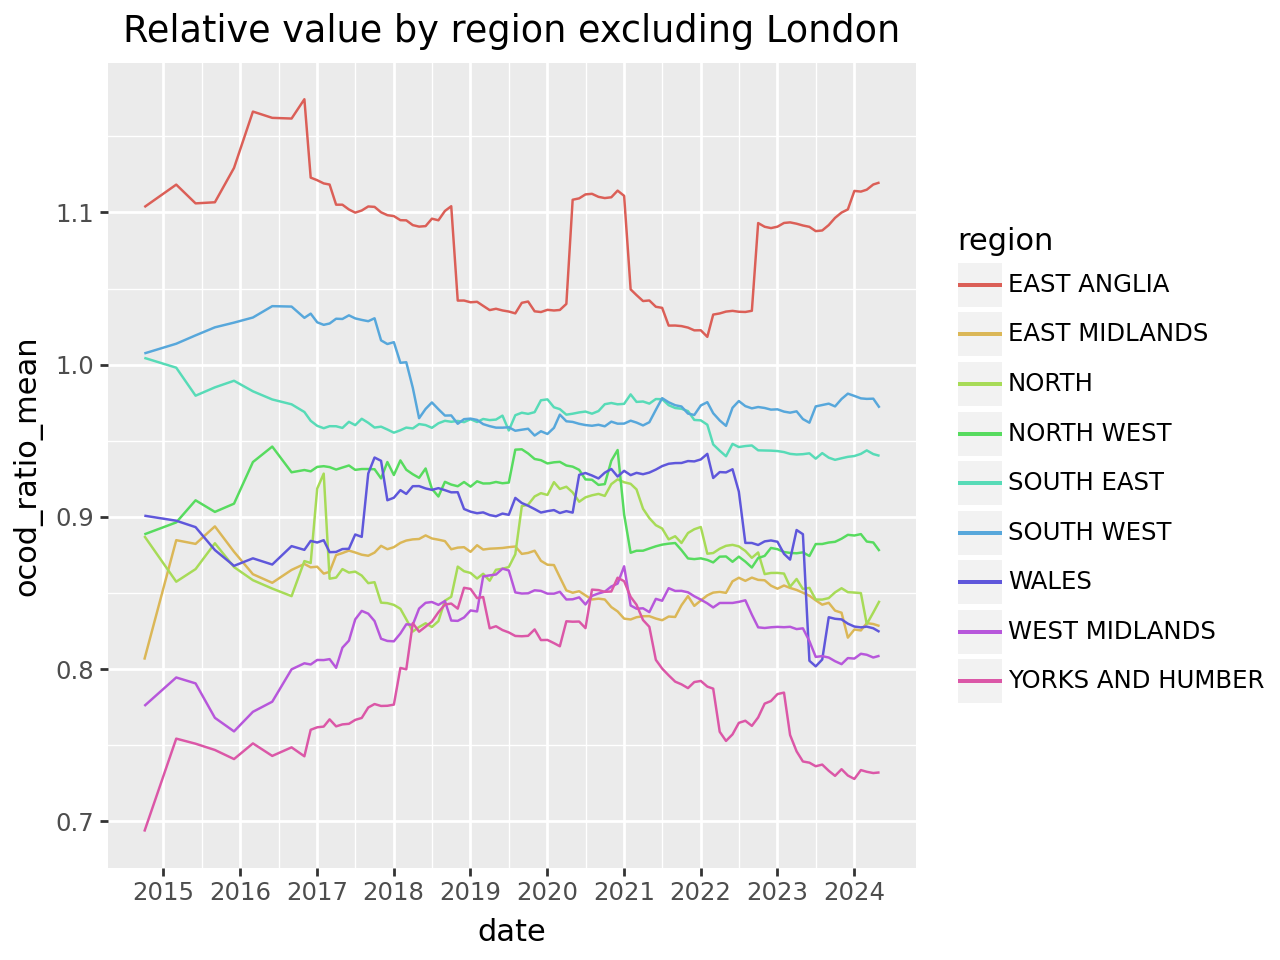

In [15]:
p = ggplot(df_msoa_region.loc[df_msoa_region['region']!='GREATER LONDON'], aes(x = 'date', y = 'ocod_ratio_mean', color = 'region')) + geom_line() + labs(
    title = "Relative value by region excluding London") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = '../figures/relative_value_excluding_london.png')

p

In [13]:
p = ggplot(df_msoa_region, aes(x = 'date', y = 'weighted_unweighted_mean_ratio', color = 'region')) + geom_line() + labs(
    title = "Relative value by region") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )


p.save(filename = '../figures/relative_value_region.png')

p

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/relative_value_region.png


PlotnineError: "Could not evaluate the 'y' mapping: 'weighted_unweighted_mean_ratio' (original error: name 'weighted_unweighted_mean_ratio' is not defined)"

In [20]:
df_msoa_nested = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['is_multi'],
ocod_path = '../data/ocod_history_processed_new',
class_var = 'class')

  1%|          | 1/99 [00:00<00:20,  4.84it/s]

Error processing OCOD_FULL_2015_10.parquet: 'is_multi'


  2%|▏         | 2/99 [00:00<00:24,  3.95it/s]

Error processing OCOD_FULL_2016_03.parquet: 'is_multi'


  3%|▎         | 3/99 [00:00<00:27,  3.45it/s]

Error processing OCOD_FULL_2016_06.parquet: 'is_multi'


  4%|▍         | 4/99 [00:01<00:27,  3.52it/s]

Error processing OCOD_FULL_2016_09.parquet: 'is_multi'


  5%|▌         | 5/99 [00:01<00:27,  3.37it/s]

Error processing OCOD_FULL_2016_12.parquet: 'is_multi'


  6%|▌         | 6/99 [00:01<00:27,  3.39it/s]

Error processing OCOD_FULL_2017_03.parquet: 'is_multi'


  7%|▋         | 7/99 [00:02<00:27,  3.29it/s]

Error processing OCOD_FULL_2017_06.parquet: 'is_multi'


  8%|▊         | 8/99 [00:02<00:28,  3.24it/s]

Error processing OCOD_FULL_2017_09.parquet: 'is_multi'


  9%|▉         | 9/99 [00:02<00:25,  3.55it/s]

Error processing OCOD_FULL_2017_11.parquet: 'is_multi'


 10%|█         | 10/99 [00:02<00:23,  3.76it/s]

Error processing OCOD_FULL_2017_12.parquet: 'is_multi'


 11%|█         | 11/99 [00:03<00:21,  4.01it/s]

Error processing OCOD_FULL_2018_01.parquet: 'is_multi'


 12%|█▏        | 12/99 [00:03<00:22,  3.95it/s]

Error processing OCOD_FULL_2018_02.parquet: 'is_multi'


 13%|█▎        | 13/99 [00:03<00:21,  3.92it/s]

Error processing OCOD_FULL_2018_03.parquet: 'is_multi'


 14%|█▍        | 14/99 [00:03<00:21,  4.00it/s]

Error processing OCOD_FULL_2018_04.parquet: 'is_multi'


 15%|█▌        | 15/99 [00:04<00:20,  4.09it/s]

Error processing OCOD_FULL_2018_05.parquet: 'is_multi'


 16%|█▌        | 16/99 [00:04<00:20,  4.11it/s]

Error processing OCOD_FULL_2018_06.parquet: 'is_multi'


 17%|█▋        | 17/99 [00:04<00:19,  4.12it/s]

Error processing OCOD_FULL_2018_07.parquet: 'is_multi'


 18%|█▊        | 18/99 [00:04<00:20,  3.98it/s]

Error processing OCOD_FULL_2018_08.parquet: 'is_multi'


 19%|█▉        | 19/99 [00:04<00:19,  4.13it/s]

Error processing OCOD_FULL_2018_09.parquet: 'is_multi'
Error processing OCOD_FULL_2018_10.parquet: 'is_multi'


 21%|██        | 21/99 [00:05<00:17,  4.37it/s]

Error processing OCOD_FULL_2018_11.parquet: 'is_multi'


 22%|██▏       | 22/99 [00:05<00:17,  4.30it/s]

Error processing OCOD_FULL_2018_12.parquet: 'is_multi'


 23%|██▎       | 23/99 [00:05<00:18,  4.02it/s]

Error processing OCOD_FULL_2019_01.parquet: 'is_multi'


 24%|██▍       | 24/99 [00:06<00:19,  3.81it/s]

Error processing OCOD_FULL_2019_02.parquet: 'is_multi'


 25%|██▌       | 25/99 [00:06<00:19,  3.75it/s]

Error processing OCOD_FULL_2019_03.parquet: 'is_multi'


 26%|██▋       | 26/99 [00:06<00:20,  3.58it/s]

Error processing OCOD_FULL_2019_04.parquet: 'is_multi'


 27%|██▋       | 27/99 [00:07<00:22,  3.24it/s]

Error processing OCOD_FULL_2019_05.parquet: 'is_multi'


 28%|██▊       | 28/99 [00:07<00:20,  3.45it/s]

Error processing OCOD_FULL_2019_06.parquet: 'is_multi'


 29%|██▉       | 29/99 [00:07<00:19,  3.67it/s]

Error processing OCOD_FULL_2019_07.parquet: 'is_multi'


 30%|███       | 30/99 [00:07<00:18,  3.81it/s]

Error processing OCOD_FULL_2019_08.parquet: 'is_multi'


 31%|███▏      | 31/99 [00:08<00:16,  4.05it/s]

Error processing OCOD_FULL_2019_09.parquet: 'is_multi'


 32%|███▏      | 32/99 [00:08<00:16,  4.14it/s]

Error processing OCOD_FULL_2019_10.parquet: 'is_multi'


 33%|███▎      | 33/99 [00:08<00:15,  4.27it/s]

Error processing OCOD_FULL_2019_11.parquet: 'is_multi'


 34%|███▍      | 34/99 [00:08<00:15,  4.26it/s]

Error processing OCOD_FULL_2019_12.parquet: 'is_multi'


 35%|███▌      | 35/99 [00:09<00:14,  4.37it/s]

Error processing OCOD_FULL_2020_01.parquet: 'is_multi'


 36%|███▋      | 36/99 [00:09<00:15,  4.14it/s]

Error processing OCOD_FULL_2020_02.parquet: 'is_multi'


 37%|███▋      | 37/99 [00:09<00:15,  3.98it/s]

Error processing OCOD_FULL_2020_03.parquet: 'is_multi'


 37%|███▋      | 37/99 [00:09<00:16,  3.78it/s]


KeyboardInterrupt: 

In [66]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,nested_title
0,2015-10-01,2015,10,802069,584312,259349,225859,3.092626,59386,20956408,47631714564,5435025639300,0.008764,False
1,2015-10-01,2015,10,833021,605354,321462,268585,2.591348,20838,6444078,17358512402,2071531738221,0.008380,True
2,2016-03-01,2016,3,832353,610137,267547,233604,3.111050,58741,20745363,48893254227,5550367259878,0.008809,False
3,2016-03-01,2016,3,838472,617114,330463,277294,2.537265,21760,6619110,18245157194,2187370952849,0.008341,True
4,2016-06-01,2016,6,845337,623067,272245,238080,3.105056,58704,20671606,49624720003,5627755182941,0.008818,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,951277,672274,452731,383084,2.101197,22400,6925014,21308613345,3135169239577,0.006797,True
194,2025-04-01,2025,4,1010574,714206,394919,347389,2.558942,52445,19141555,52999605383,7559364582734,0.007011,False
195,2025-04-01,2025,4,944018,667680,452342,383012,2.086954,22373,6946529,21120522673,3142211706545,0.006722,True
196,2025-05-01,2025,5,1008623,714901,395173,347733,2.552358,52405,19122597,52856917750,7556739795774,0.006995,False


In [16]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_mean_ratio', color = 'nested_title')) + geom_line() + labs(
    title = "Relative value nested status") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = '../figures/relative_value_nested.png')

p

NameError: name 'df_msoa_nested' is not defined

In [68]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,nested_title
0,2015-10-01,2015,10,802069,584312,259349,225859,3.092626,59386,20956408,47631714564,5435025639300,0.008764,False
1,2015-10-01,2015,10,833021,605354,321462,268585,2.591348,20838,6444078,17358512402,2071531738221,0.008380,True
2,2016-03-01,2016,3,832353,610137,267547,233604,3.111050,58741,20745363,48893254227,5550367259878,0.008809,False
3,2016-03-01,2016,3,838472,617114,330463,277294,2.537265,21760,6619110,18245157194,2187370952849,0.008341,True
4,2016-06-01,2016,6,845337,623067,272245,238080,3.105056,58704,20671606,49624720003,5627755182941,0.008818,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,951277,672274,452731,383084,2.101197,22400,6925014,21308613345,3135169239577,0.006797,True
194,2025-04-01,2025,4,1010574,714206,394919,347389,2.558942,52445,19141555,52999605383,7559364582734,0.007011,False
195,2025-04-01,2025,4,944018,667680,452342,383012,2.086954,22373,6946529,21120522673,3142211706545,0.006722,True
196,2025-05-01,2025,5,1008623,714901,395173,347733,2.552358,52405,19122597,52856917750,7556739795774,0.006995,False


In [21]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_total_counts', color = 'is_multi')) + geom_line() + labs(
    title = "Relative value nested status") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p

NameError: name 'df_msoa_nested' is not defined

## The total number of properties
 

In [12]:
df_msoa_nested.groupby('date')['total_counts'].sum()

date
2015-10-01    80224
2016-03-01    80501
2016-06-01    80835
2016-09-01    79990
2016-12-01    80148
              ...  
2025-01-01    75258
2025-02-01    75094
2025-03-01    74981
2025-04-01    74818
2025-05-01    74746
Name: total_counts, Length: 99, dtype: int64

# Country of Incorporation
 

In [13]:
df_msoa_incorporated = create_time_series_by_groups( ['country_incorporated'])

100%|██████████| 99/99 [00:37<00:00,  2.66it/s]


In [25]:
df_msoa_incorporated.to_csv('country.csv')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/relative_value_incorporation.png


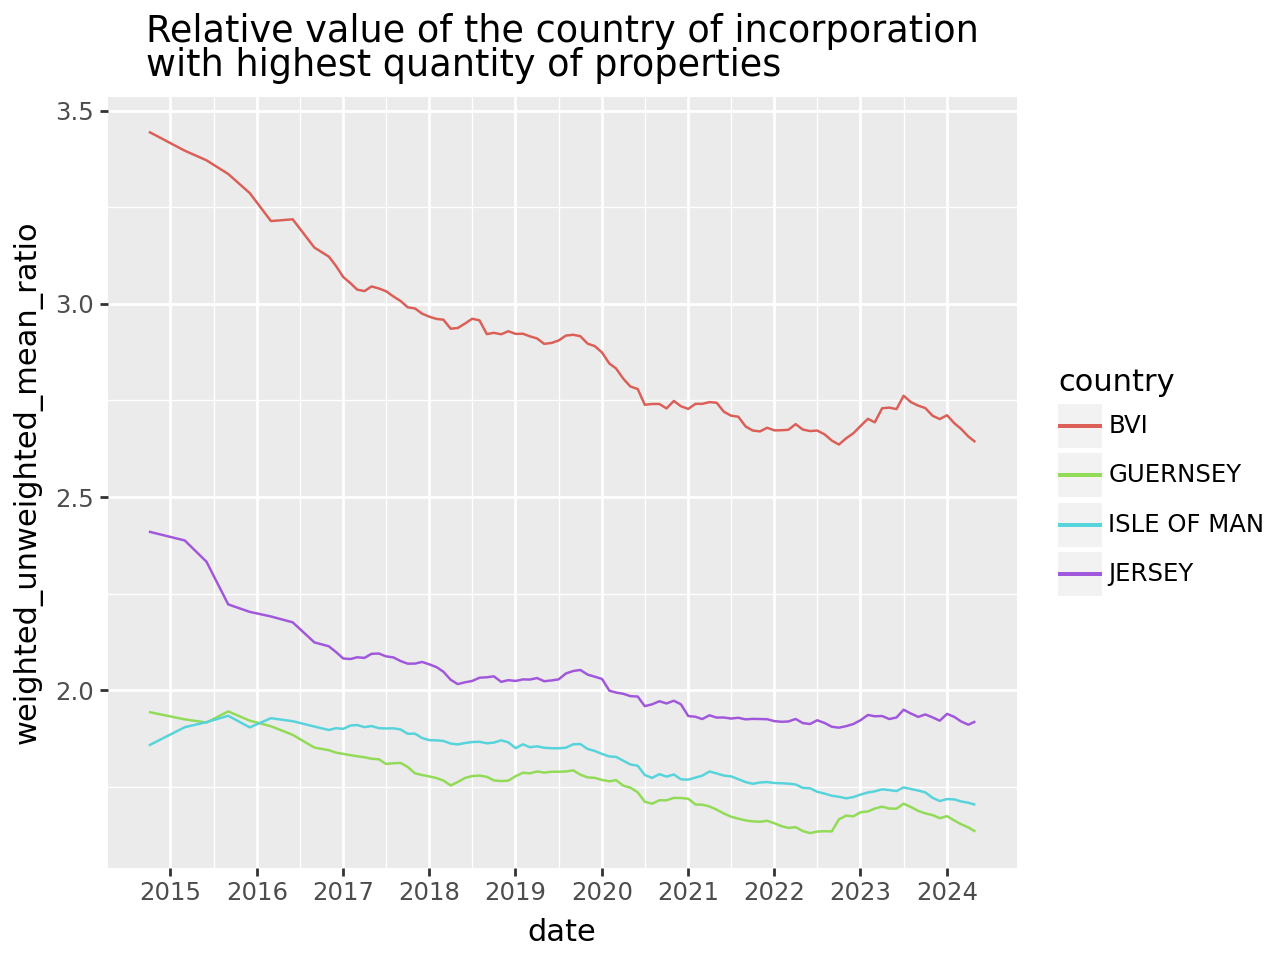

In [14]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p =  ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['JERSEY', 'GUERNSEY', 
'ISLE OF MAN', 'BRITISH VIRGIN ISLANDS', 'BVI'])], 
aes(x = 'date', y = 'weighted_unweighted_mean_ratio', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith highest quantity of properties") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = '../figures/relative_value_incorporation.png')

p

In [15]:
df_msoa_incorporated

,date,year,month,ocod_weighted_mean,ocod_weighted_median,ocod_unweighted_mean,ocod_unweighted_median,weighted_unweighted_mean_ratio,weighted_unweighted_median_ratio,total_counts,total_value_mean,total_value_median,country_incorporated
0,2015-10-01,2015,10,122117,112500,122117,112500,1.000000,1.000000,4,488469,450000,00002065
1,2015-10-01,2015,10,111820,100000,111820,100000,1.000000,1.000000,1,111820,100000,0003280
2,2015-10-01,2015,10,161230,140000,161230,140000,1.000000,1.000000,1,161230,140000,085544C
3,2015-10-01,2015,10,434115,354300,434115,354300,1.000000,1.000000,2,868231,708600,1005646
4,2015-10-01,2015,10,516244,439975,516244,439975,1.000000,1.000000,1,516244,439975,1012258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,2025-05-01,2025,5,511530,445185,516575,446199,0.990232,0.997727,8,4092240,3561480,"WASHINGTON, U.S.A."
19613,2025-05-01,2025,5,3213261,1501000,3213261,1501000,1.000000,1.000000,2,6426522,3002000,WESTERN SAMOA
19614,2025-05-01,2025,5,280000,237583,280000,237583,1.000000,1.000000,3,840000,712750,"WISCONSIN, U.S.A."
19615,2025-05-01,2025,5,1269905,893861,1175917,794500,1.079927,1.125061,18,22858299,16089500,"WYOMING, U.S.A."


In [16]:
df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['BVI', 'JERSEY', 'GUERNSEY', 'ISLO OF MAN']),
'total_counts':]

,total_counts,total_value_mean,total_value_median,country_incorporated
52,21052,24114955272,17092652191,BVI
88,10494,6449650071,4780219046,GUERNSEY
112,14671,9671866230,7206887775,JERSEY
268,21206,24684066037,17647309183,BVI
305,10788,6708633510,5045726332,GUERNSEY
...,...,...,...,...
19297,12292,8822687626,6701688169,GUERNSEY
19315,15440,12282698959,8973765760,JERSEY
19452,18390,24552579791,16767990180,BVI
19487,12240,8726226299,6645848116,GUERNSEY


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/relative_value_incorporation_increases.png


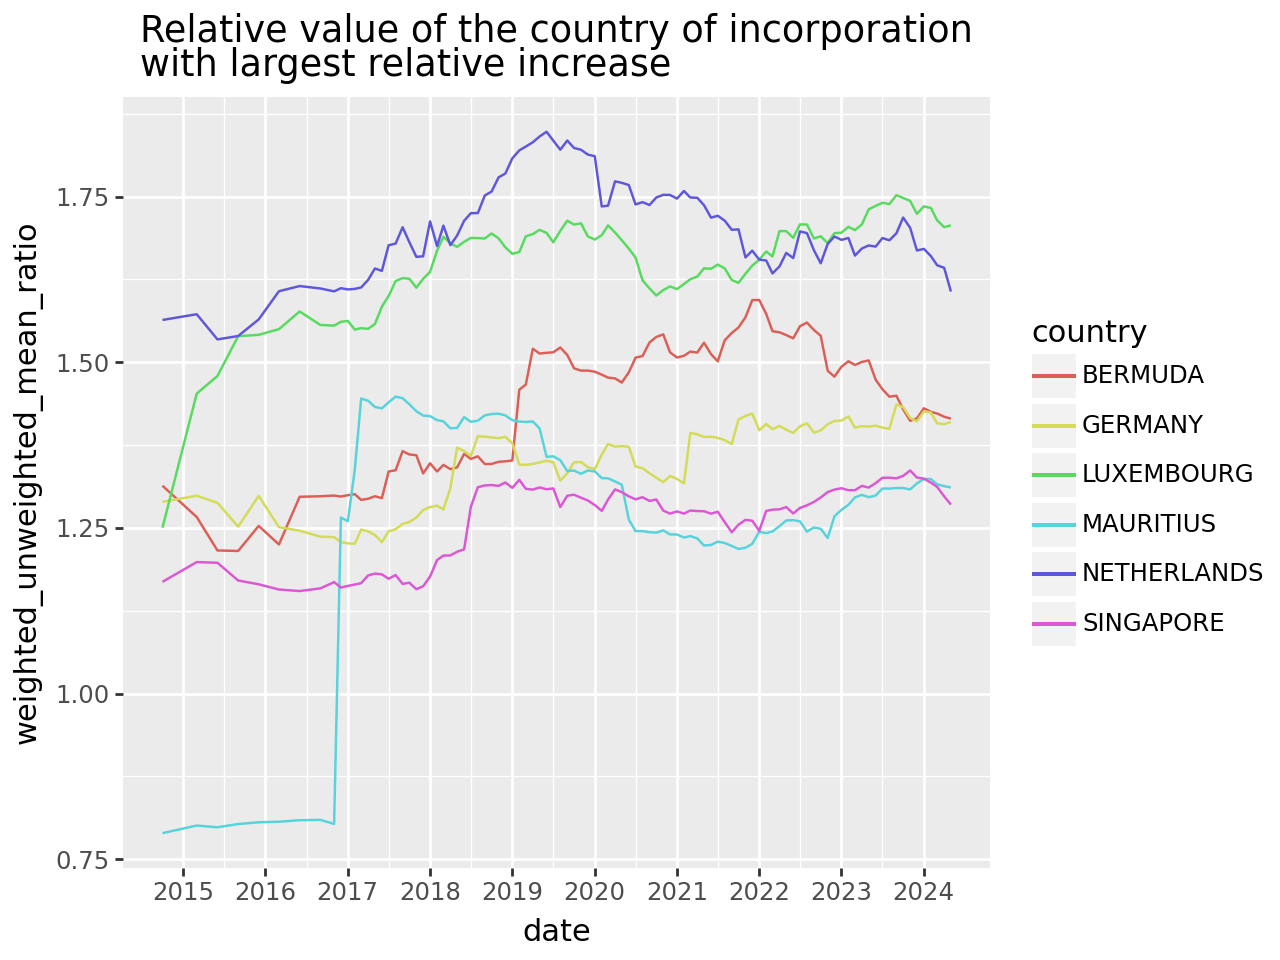

In [17]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p = ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin([ 'LUXEMBOURG', 'MAURITIUS', 
'SINGAPORE', 'GERMANY', 'BERMUDA', 'NETHERLANDS'])], 
aes(x = 'date', y = 'weighted_unweighted_mean_ratio', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith largest relative increase") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = '../figures/relative_value_incorporation_increases.png')

p

In [18]:
countries = [
    "JERSEY",
    "BVI",
    "GUERNSEY",
    "ISLE OF MAN",
    "GIBRALTAR",
    "LUXEMBOURG",
    "SINGAPORE",
    "IRELAND",
    "HONG KONG",
    "PANAMA",
    "CAYMAN ISLANDS",
    "SEYCHELLES",
    "NETHERLANDS",
    "CYPRUS",
    "BAHAMAS",
    "MAURITIUS",
    "GERMANY",
    "AUSTRALIA",
    "BERMUDA",
    "DELAWARE, U.S.A."
]

In [19]:
df = df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(countries)]

# Get values at min and max dates
grouped = df.groupby('country_incorporated').apply(
    lambda x: pd.Series({
        'min_date_value': x.loc[x['date'].idxmin(), 'weighted_unweighted_mean_ratio'],
        'max_date_value': x.loc[x['date'].idxmax(), 'weighted_unweighted_mean_ratio']
    })
)

# Calculate ratio of change
grouped['ratio_change'] = grouped['max_date_value'] / grouped['min_date_value']
result = grouped['ratio_change']

result.sort_values().reset_index()

/tmp/ipykernel_2252/3819271352.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,country_incorporated,ratio_change
0,AUSTRALIA,0.639478
1,BVI,0.766989
2,JERSEY,0.796234
3,CAYMAN ISLANDS,0.830600
4,GUERNSEY,0.840845
5,BAHAMAS,0.873460
6,SEYCHELLES,0.878846
7,HONG KONG,0.910346
8,PANAMA,0.916263
9,ISLE OF MAN,0.917338


In [20]:
df

,date,year,month,ocod_weighted_mean,ocod_weighted_median,ocod_unweighted_mean,ocod_unweighted_median,weighted_unweighted_mean_ratio,weighted_unweighted_median_ratio,total_counts,total_value_mean,total_value_median,country_incorporated
38,2015-10-01,2015,10,957090,680779,606322,455655,1.578516,1.494067,322,308183153,219210926,AUSTRALIA
40,2015-10-01,2015,10,1092434,778875,551529,430887,1.980736,1.807608,1190,1299997576,926861477,BAHAMAS
49,2015-10-01,2015,10,552631,418121,420709,327876,1.313571,1.275242,479,264710328,200280290,BERMUDA
52,2015-10-01,2015,10,1145494,811925,332477,282893,3.445335,2.870070,21052,24114955272,17092652191,BVI
57,2015-10-01,2015,10,888002,636009,442248,344353,2.007928,1.846966,1102,978579047,700881997,CAYMAN ISLANDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2025-05-01,2025,5,1006787,727208,767917,585257,1.311062,1.242545,400,402715102,290883596,MAURITIUS
19534,2025-05-01,2025,5,1091062,773259,679107,529623,1.606613,1.460019,481,524801204,371938038,NETHERLANDS
19555,2025-05-01,2025,5,2022104,1259178,833836,625064,2.425062,2.014477,1124,2272845769,1415316766,PANAMA
19571,2025-05-01,2025,5,725950,560715,576920,472886,1.258320,1.185728,1230,892919674,689679533,SEYCHELLES


In [21]:

df_msoa_region_nested = create_time_series_by_groups( ['region', 'nested_title'])

100%|██████████| 99/99 [00:30<00:00,  3.23it/s]


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/relative_value_nested_region.png


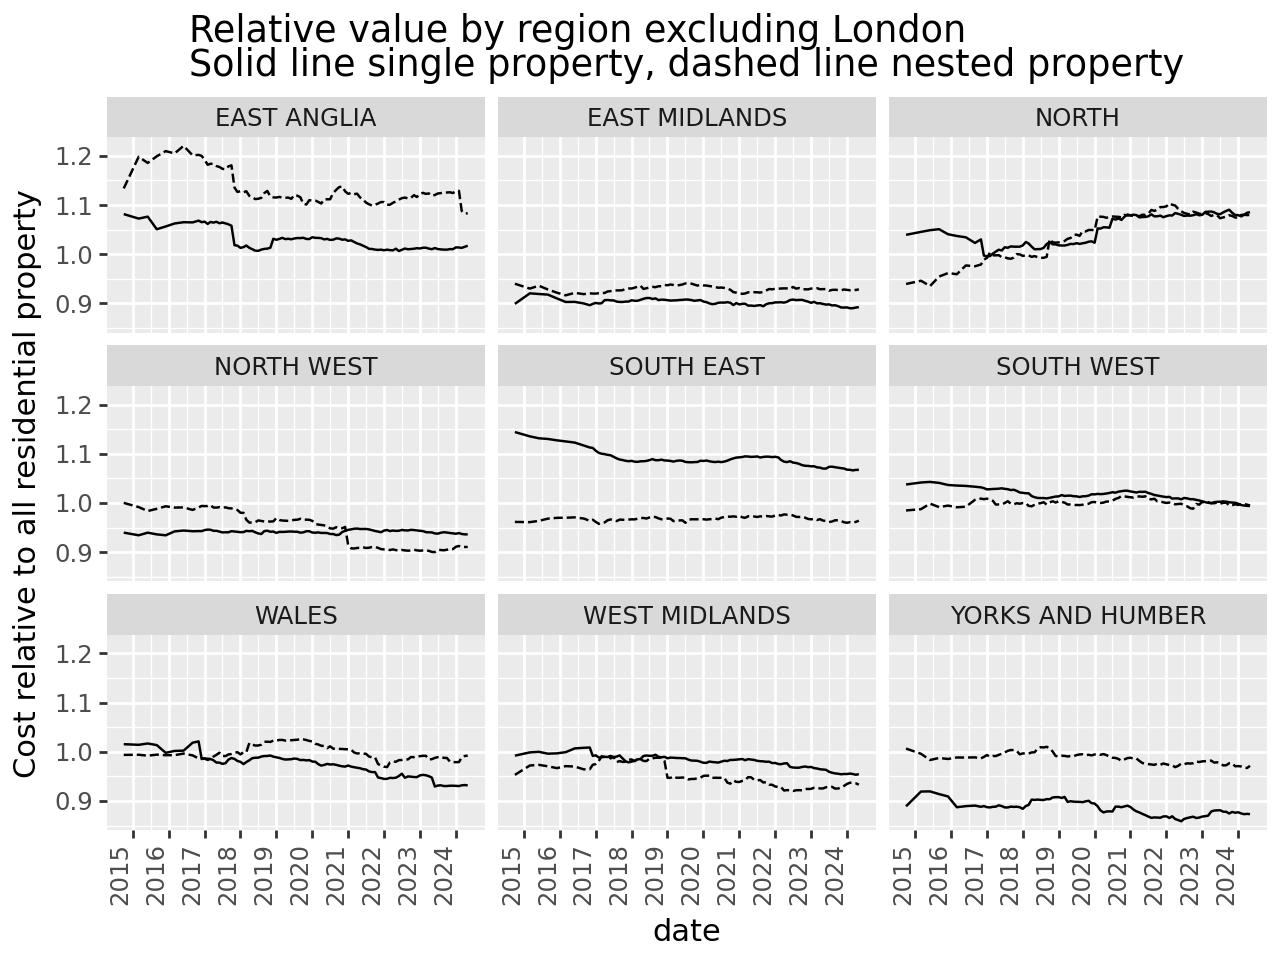

In [22]:
p = ggplot(df_msoa_region_nested.loc[df_msoa_region_nested['region']!='GREATER LONDON'], 
aes(x = 'date', y = 'weighted_unweighted_mean_ratio', linetype = 'nested_title')) + geom_line() + labs(
    title = "Relative value by region excluding London\nSolid line single property, dashed line nested property",
    linetype = 'nested',
    y = 'Cost relative to all residential property') +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region_nested['date'].min(), end=df_msoa_region_nested['date'].max(), freq='YE'),
     date_labels='%Y'
 ) + facet_wrap("region") +\
    theme(
        axis_text_x=element_text(angle=90,hjust = 1),
        legend_position = 'none'
    )


p.save(filename = figures_folder / 'relative_value_nested_region.png')

p

In [3]:
df_msoa_lad = create_time_series_by_groups( ['lad11cd'])


100%|██████████| 99/99 [00:32<00:00,  3.07it/s]


In [6]:
df_msoa_lad

,date,year,month,ocod_weighted_mean,ocod_weighted_median,ocod_unweighted_mean,ocod_unweighted_median,weighted_unweighted_mean_ratio,weighted_unweighted_median_ratio,total_counts,total_value_mean,total_value_median,lad11cd
0,2015-10-01,2015,10,85808,75346,102161,94184,0.839931,0.799990,36,3089107,2712475,E06000001
1,2015-10-01,2015,10,86316,76982,110463,99959,0.781407,0.770140,83,7164299,6389550,E06000002
2,2015-10-01,2015,10,107756,96375,117244,104807,0.919074,0.919547,38,4094756,3662267,E06000003
3,2015-10-01,2015,10,150381,138366,129757,120217,1.158943,1.150973,62,9323638,8578747,E06000004
4,2015-10-01,2015,10,118703,110795,124006,114807,0.957235,0.965053,22,2611473,2437500,E06000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,2025-05-01,2025,5,229310,205937,196377,176875,1.167701,1.164311,8,1834482,1647500,W06000020
31478,2025-05-01,2025,5,368560,336144,374078,340298,0.985250,0.987795,17,6265532,5714460,W06000021
31479,2025-05-01,2025,5,236459,218117,226677,209781,1.043154,1.039736,47,11113597,10251500,W06000022
31480,2025-05-01,2025,5,260960,238645,271143,245625,0.962445,0.971586,12,3131528,2863750,W06000023


In [8]:
df_msoa_lad['fraction'] = df_msoa_lad.groupby('date')['total_value_mean'].transform(lambda x: x / x.sum())

In [11]:
df_msoa_lad.groupby('lad11cd')[['fraction', 'total_value_mean']].mean().sort_values('fraction')

,fraction,total_value_mean
lad11cd,,
E07000136,0.000014,9.848934e+05
E06000053,0.000014,1.015548e+06
W06000019,0.000016,1.147755e+06
W06000024,0.000016,1.156881e+06
W06000020,0.000022,1.565239e+06
...,...,...
E09000013,0.019611,1.420076e+09
E09000032,0.022521,1.636744e+09
E09000007,0.043378,3.147165e+09


In [28]:
df_msoa_lad.to_csv('../data/lad.csv')